In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

In [6]:
x = df.drop('Outcome',axis=1).values
y = df['Outcome'].values

In [7]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x = scalar.fit_transform(x)

In [8]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [9]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [79]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense , Dropout

In [12]:
model = Sequential()

model.add(Dense(32,activation='relu',input_dim=8))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
model.fit(x_train , y_train , epochs=100,batch_size=32,validation_data=(x_test,y_test))

Epoch 1/100
20/20 [==============================] - 0s 13ms/step - loss: 0.4416 - accuracy: 0.7850 - val_loss: 0.5266 - val_accuracy: 0.7532
Epoch 2/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4405 - accuracy: 0.7883 - val_loss: 0.5265 - val_accuracy: 0.7597
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4385 - accuracy: 0.7899 - val_loss: 0.5257 - val_accuracy: 0.7597
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4377 - accuracy: 0.7834 - val_loss: 0.5262 - val_accuracy: 0.7597
Epoch 5/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4378 - accuracy: 0.7866 - val_loss: 0.5275 - val_accuracy: 0.7532
Epoch 6/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4348 - accuracy: 0.7899 - val_loss: 0.5263 - val_accuracy: 0.7532
Epoch 7/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4347 - accuracy: 0.7932 - val_loss: 0.5287 - val_accuracy: 0.7597
Epoch 8/100


Epoch 59/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4038 - accuracy: 0.7997 - val_loss: 0.5476 - val_accuracy: 0.7403
Epoch 60/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4033 - accuracy: 0.7997 - val_loss: 0.5470 - val_accuracy: 0.7403
Epoch 61/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4036 - accuracy: 0.7997 - val_loss: 0.5463 - val_accuracy: 0.7403
Epoch 62/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4031 - accuracy: 0.7980 - val_loss: 0.5471 - val_accuracy: 0.7403
Epoch 63/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4025 - accuracy: 0.8013 - val_loss: 0.5468 - val_accuracy: 0.7403
Epoch 64/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4017 - accuracy: 0.8078 - val_loss: 0.5479 - val_accuracy: 0.7403
Epoch 65/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4018 - accuracy: 0.7997 - val_loss: 0.5492 - val_accuracy: 0.7403
Epoch 

# Keras Tuner

In [16]:
# 1. How to select apprpiate optimizer
# 2. No of nodes in layer
# 3. How To select No. of layers
# 4. All in One model

In [ ]:
# 1. Select appropiate optimizer

In [18]:
!pip install -U keras-tuner

     ---------------------------------------- 0.0/176.1 kB ? eta -:--:--
     -------------------------------------- 176.1/176.1 kB 5.4 MB/s eta 0:00:00


In [20]:
import keras_tuner as kt

In [21]:
def build_model(hp):
    
    model = Sequential()
    
    model.add(Dense(32,activation='relu',input_dim=8))
    model.add(Dense(1,activation='sigmoid'))
    
    optimizer = hp.Choice('optimizer',values = ['adam','rmsprop','sgd','adadelta'])
    model.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [22]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5)

In [23]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 4 Complete [00h 00m 04s]
val_accuracy: 0.7207792401313782

Best val_accuracy So Far: 0.8181818127632141
Total elapsed time: 00h 00m 16s
INFO:tensorflow:Oracle triggered exit


In [27]:
tuner.get_best_hyperparameters()[0].values                    ### best hyperparameter

{'optimizer': 'rmsprop'}

In [32]:
model = tuner.get_best_models(num_models=1)[0]                ### fetching the best model architecture

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.fit(x_train , y_train , batch_size=32,epochs=100,initial_epoch=6,validation_data=(x_test,y_test))
### model has alredy trained on first 5 epochs

Epoch 7/100
20/20 [==============================] - 1s 23ms/step - loss: 0.5080 - accuracy: 0.7655 - val_loss: 0.5084 - val_accuracy: 0.8312
Epoch 8/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4946 - accuracy: 0.7720 - val_loss: 0.5005 - val_accuracy: 0.8052
Epoch 9/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4851 - accuracy: 0.7752 - val_loss: 0.4955 - val_accuracy: 0.8052
Epoch 10/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4769 - accuracy: 0.7720 - val_loss: 0.4935 - val_accuracy: 0.7987
Epoch 11/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4704 - accuracy: 0.7785 - val_loss: 0.4916 - val_accuracy: 0.7857
Epoch 12/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4656 - accuracy: 0.7752 - val_loss: 0.4896 - val_accuracy: 0.7922
Epoch 13/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4616 - accuracy: 0.7769 - val_loss: 0.4918 - val_accuracy: 0.7857
Epoch 14

Epoch 65/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4134 - accuracy: 0.8029 - val_loss: 0.5146 - val_accuracy: 0.7532
Epoch 66/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4130 - accuracy: 0.8062 - val_loss: 0.5131 - val_accuracy: 0.7532
Epoch 67/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4123 - accuracy: 0.8062 - val_loss: 0.5128 - val_accuracy: 0.7532
Epoch 68/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4122 - accuracy: 0.8078 - val_loss: 0.5136 - val_accuracy: 0.7532
Epoch 69/100
20/20 [==============================] - 0s 12ms/step - loss: 0.4119 - accuracy: 0.8046 - val_loss: 0.5126 - val_accuracy: 0.7532
Epoch 70/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4117 - accuracy: 0.8029 - val_loss: 0.5135 - val_accuracy: 0.7532
Epoch 71/100
20/20 [==============================] - 0s 6ms/step - loss: 0.4111 - accuracy: 0.8127 - val_loss: 0.5128 - val_accuracy: 0.7532
Epoch

In [35]:
# Write no. of neurons

In [47]:
def build_model(hp):
    model = Sequential()
    
    unit = hp.Int('units',min_value=8,max_value=128,step=8)
    model.add(Dense(units=unit,activation='relu',input_dim=8))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
    return model

In [ ]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='mydir')

In [49]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.7597402334213257

Best val_accuracy So Far: 0.7597402334213257
Total elapsed time: 00h 00m 13s
INFO:tensorflow:Oracle triggered exit


In [53]:
tuner.get_best_hyperparameters()[0].values

{'units': 96}

In [54]:
model = tuner.get_best_models(num_models=1)[0]

In [55]:
model.fit(x_train,y_train,batch_size=32,epochs=100,initial_epoch=6,validation_data=(x_test,y_test))

Epoch 7/100
20/20 [==============================] - 1s 24ms/step - loss: 0.4936 - accuracy: 0.7638 - val_loss: 0.5084 - val_accuracy: 0.7662
Epoch 8/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4788 - accuracy: 0.7687 - val_loss: 0.5011 - val_accuracy: 0.7662
Epoch 9/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4678 - accuracy: 0.7736 - val_loss: 0.4983 - val_accuracy: 0.7727
Epoch 10/100
20/20 [==============================] - 0s 8ms/step - loss: 0.4614 - accuracy: 0.7720 - val_loss: 0.4992 - val_accuracy: 0.7597
Epoch 11/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4551 - accuracy: 0.7720 - val_loss: 0.4989 - val_accuracy: 0.7597
Epoch 12/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4509 - accuracy: 0.7752 - val_loss: 0.4970 - val_accuracy: 0.7662
Epoch 13/100
20/20 [==============================] - 0s 7ms/step - loss: 0.4485 - accuracy: 0.7785 - val_loss: 0.5001 - val_accuracy: 0.7662
Epoch 14

Epoch 65/100
20/20 [==============================] - 0s 8ms/step - loss: 0.3957 - accuracy: 0.8078 - val_loss: 0.5533 - val_accuracy: 0.7597
Epoch 66/100
20/20 [==============================] - 0s 7ms/step - loss: 0.3951 - accuracy: 0.8029 - val_loss: 0.5499 - val_accuracy: 0.7532
Epoch 67/100
20/20 [==============================] - 0s 7ms/step - loss: 0.3946 - accuracy: 0.8062 - val_loss: 0.5495 - val_accuracy: 0.7597
Epoch 68/100
20/20 [==============================] - 0s 8ms/step - loss: 0.3938 - accuracy: 0.8143 - val_loss: 0.5511 - val_accuracy: 0.7597
Epoch 69/100
20/20 [==============================] - 0s 7ms/step - loss: 0.3943 - accuracy: 0.8127 - val_loss: 0.5500 - val_accuracy: 0.7662
Epoch 70/100
20/20 [==============================] - 0s 7ms/step - loss: 0.3934 - accuracy: 0.8143 - val_loss: 0.5541 - val_accuracy: 0.7532
Epoch 71/100
20/20 [==============================] - 0s 6ms/step - loss: 0.3928 - accuracy: 0.8160 - val_loss: 0.5526 - val_accuracy: 0.7532
Epoch 

### How to Select no. of layers 

In [58]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(72,activation='relu',input_dim=8))
    for i in range(hp.Int('num_layers',min_value=1,max_value=10)):
        model.add(Dense(72,activation='relu'))
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

In [59]:
tuner = kt.RandomSearch(build_model,objective='val_accuracy',max_trials=3,directory='mydirv',project_name='num_layers')

In [60]:
tuner.search(x_train,y_train , epochs=5,validation_data=(x_test,y_test))

Trial 3 Complete [00h 00m 04s]
val_accuracy: 0.7532467246055603

Best val_accuracy So Far: 0.8181818127632141
Total elapsed time: 00h 00m 22s
INFO:tensorflow:Oracle triggered exit


In [61]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 7}

In [63]:
model = tuner.get_best_models(num_models=1)[0]

In [65]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
20/20 [==============================] - 3s 38ms/step - loss: 0.4520 - accuracy: 0.7883 - val_loss: 0.5544 - val_accuracy: 0.7662
Epoch 2/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4415 - accuracy: 0.7964 - val_loss: 0.5077 - val_accuracy: 0.7532
Epoch 3/100
20/20 [==============================] - 0s 11ms/step - loss: 0.4288 - accuracy: 0.8013 - val_loss: 0.5661 - val_accuracy: 0.7792
Epoch 4/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4275 - accuracy: 0.8013 - val_loss: 0.5373 - val_accuracy: 0.7727
Epoch 5/100
20/20 [==============================] - 0s 9ms/step - loss: 0.4176 - accuracy: 0.8046 - val_loss: 0.5625 - val_accuracy: 0.7403
Epoch 6/100
20/20 [==============================] - 0s 9ms/step - loss: 0.3979 - accuracy: 0.8208 - val_loss: 0.5963 - val_accuracy: 0.7013
Epoch 7/100
20/20 [==============================] - 0s 10ms/step - loss: 0.3909 - accuracy: 0.8241 - val_loss: 0.5368 - val_accuracy: 0.7597
Epoch 8/10

20/20 [==============================] - 0s 9ms/step - loss: 0.0224 - accuracy: 0.9935 - val_loss: 2.6499 - val_accuracy: 0.7143
Epoch 59/100
20/20 [==============================] - 1s 27ms/step - loss: 0.0706 - accuracy: 0.9723 - val_loss: 1.9826 - val_accuracy: 0.6948
Epoch 60/100
20/20 [==============================] - 0s 16ms/step - loss: 0.0304 - accuracy: 0.9902 - val_loss: 2.7714 - val_accuracy: 0.6883
Epoch 61/100
20/20 [==============================] - 0s 11ms/step - loss: 0.0391 - accuracy: 0.9837 - val_loss: 2.2842 - val_accuracy: 0.6948
Epoch 62/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0169 - accuracy: 0.9935 - val_loss: 2.8457 - val_accuracy: 0.6688
Epoch 63/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0749 - accuracy: 0.9772 - val_loss: 2.3099 - val_accuracy: 0.6818
Epoch 64/100
20/20 [==============================] - 0s 9ms/step - loss: 0.0595 - accuracy: 0.9821 - val_loss: 2.2060 - val_accuracy: 0.7338
Epoch 65/100
20/

In [66]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 72)                648       
                                                                 
 dense_1 (Dense)             (None, 72)                5256      
                                                                 
 dense_2 (Dense)             (None, 72)                5256      
                                                                 
 dense_3 (Dense)             (None, 72)                5256      
                                                                 
 dense_4 (Dense)             (None, 72)                5256      
                                                                 
 dense_5 (Dense)             (None, 72)                5256      
                                                                 
 dense_6 (Dense)             (None, 72)                5

### Everything Together 

In [85]:
def build_model(hp):
    model = Sequential()
    
    counter=0
    
    for i in range(hp.Int('num_layer',min_value=1,max_value=10)):
        if counter==0:
            model.add(Dense(units=hp.Int('units'+str(i),
                                         min_value=8,
                                         max_value=128,step=8),
                           activation=hp.Choice('activation'+str(i),
                                                values=['tanh','sigmoid','relu']),
                           input_dim=8
                           )
                     )
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        else :
            model.add(Dense(units=hp.Int('units'+str(i),
                                         min_value=8,
                                         max_value=128,step=8),
                           activation=hp.Choice('activation'+str(i),
                                                values=['tanh','sigmoid','relu'])
                           )
                     )
            model.add(Dropout(hp.Choice('dropout'+str(i),values=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9])))
        counter+=1
    model.add(Dense(1,activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=hp.Choice('optimizer',values=['rmsprop','sgd','adam','nadam','adadelta']),
                 metrics=['accuracy'])
    return model

In [86]:
tuner = kt.RandomSearch(build_model,
                       max_trials=5,
                       objective='val_accuracy',
                       directory='mydir',project_name='final1')

In [87]:
tuner.search(x_train,y_train,epochs=5,validation_data=(x_test,y_test))

Trial 5 Complete [00h 00m 04s]
val_accuracy: 0.6428571343421936

Best val_accuracy So Far: 0.7272727489471436
Total elapsed time: 00h 00m 21s
INFO:tensorflow:Oracle triggered exit


In [88]:
tuner.get_best_hyperparameters()[0].values

{'num_layer': 6,
 'units0': 8,
 'activation0': 'sigmoid',
 'dropout0': 0.1,
 'optimizer': 'rmsprop',
 'units1': 8,
 'activation1': 'tanh',
 'dropout1': 0.1,
 'units2': 8,
 'activation2': 'tanh',
 'dropout2': 0.1,
 'units3': 8,
 'activation3': 'tanh',
 'dropout3': 0.1,
 'units4': 8,
 'activation4': 'tanh',
 'dropout4': 0.1,
 'units5': 8,
 'activation5': 'tanh',
 'dropout5': 0.1}

In [89]:
model =tuner.get_best_models()[0]

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 8)                 72        
                                                                 
 dropout_2 (Dropout)         (None, 8)                 0         
                                                                 
 dense_3 (Dense)             (None, 8)                 7

In [92]:
history = model.fit(x_train,y_train,epochs=200,validation_data=(x_test,y_test),batch_size=32)

Epoch 1/200
20/20 [==============================] - 0s 13ms/step - loss: 0.4995 - accuracy: 0.7622 - val_loss: 0.5123 - val_accuracy: 0.7532
Epoch 2/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4844 - accuracy: 0.7736 - val_loss: 0.5159 - val_accuracy: 0.7468
Epoch 3/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4869 - accuracy: 0.7622 - val_loss: 0.5128 - val_accuracy: 0.7532
Epoch 4/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4852 - accuracy: 0.7752 - val_loss: 0.5169 - val_accuracy: 0.7468
Epoch 5/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4897 - accuracy: 0.7606 - val_loss: 0.5203 - val_accuracy: 0.7403
Epoch 6/200
20/20 [==============================] - 0s 8ms/step - loss: 0.5020 - accuracy: 0.7622 - val_loss: 0.5142 - val_accuracy: 0.7468
Epoch 7/200
20/20 [==============================] - 0s 8ms/step - loss: 0.5033 - accuracy: 0.7557 - val_loss: 0.5170 - val_accuracy: 0.7403
Epoch 8/200


Epoch 59/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4880 - accuracy: 0.7459 - val_loss: 0.5142 - val_accuracy: 0.7468
Epoch 60/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4838 - accuracy: 0.7883 - val_loss: 0.5108 - val_accuracy: 0.7532
Epoch 61/200
20/20 [==============================] - 0s 7ms/step - loss: 0.4908 - accuracy: 0.7524 - val_loss: 0.5072 - val_accuracy: 0.7532
Epoch 62/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4820 - accuracy: 0.7704 - val_loss: 0.5129 - val_accuracy: 0.7468
Epoch 63/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4670 - accuracy: 0.7948 - val_loss: 0.5110 - val_accuracy: 0.7532
Epoch 64/200
20/20 [==============================] - 0s 9ms/step - loss: 0.4985 - accuracy: 0.7622 - val_loss: 0.5085 - val_accuracy: 0.7597
Epoch 65/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4700 - accuracy: 0.7834 - val_loss: 0.5177 - val_accuracy: 0.7403
Epoch 

20/20 [==============================] - 0s 8ms/step - loss: 0.4790 - accuracy: 0.7671 - val_loss: 0.5074 - val_accuracy: 0.7662
Epoch 117/200
20/20 [==============================] - 0s 7ms/step - loss: 0.4731 - accuracy: 0.7932 - val_loss: 0.5076 - val_accuracy: 0.7662
Epoch 118/200
20/20 [==============================] - 0s 7ms/step - loss: 0.4787 - accuracy: 0.7818 - val_loss: 0.5095 - val_accuracy: 0.7662
Epoch 119/200
20/20 [==============================] - 0s 7ms/step - loss: 0.4853 - accuracy: 0.7671 - val_loss: 0.5138 - val_accuracy: 0.7403
Epoch 120/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4767 - accuracy: 0.7687 - val_loss: 0.5055 - val_accuracy: 0.7662
Epoch 121/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4732 - accuracy: 0.7687 - val_loss: 0.5065 - val_accuracy: 0.7662
Epoch 122/200
20/20 [==============================] - 0s 7ms/step - loss: 0.4726 - accuracy: 0.7818 - val_loss: 0.5060 - val_accuracy: 0.7662
Epoch 123/200

20/20 [==============================] - 0s 8ms/step - loss: 0.4666 - accuracy: 0.7834 - val_loss: 0.5133 - val_accuracy: 0.7597
Epoch 174/200
20/20 [==============================] - 0s 7ms/step - loss: 0.4715 - accuracy: 0.7834 - val_loss: 0.5157 - val_accuracy: 0.7597
Epoch 175/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4873 - accuracy: 0.7573 - val_loss: 0.5164 - val_accuracy: 0.7532
Epoch 176/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4746 - accuracy: 0.7915 - val_loss: 0.5218 - val_accuracy: 0.7403
Epoch 177/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4882 - accuracy: 0.7655 - val_loss: 0.5250 - val_accuracy: 0.7403
Epoch 178/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4568 - accuracy: 0.7980 - val_loss: 0.5183 - val_accuracy: 0.7532
Epoch 179/200
20/20 [==============================] - 0s 8ms/step - loss: 0.4707 - accuracy: 0.7850 - val_loss: 0.5177 - val_accuracy: 0.7532
Epoch 180/200

TypeError: 'History' object is not subscriptable

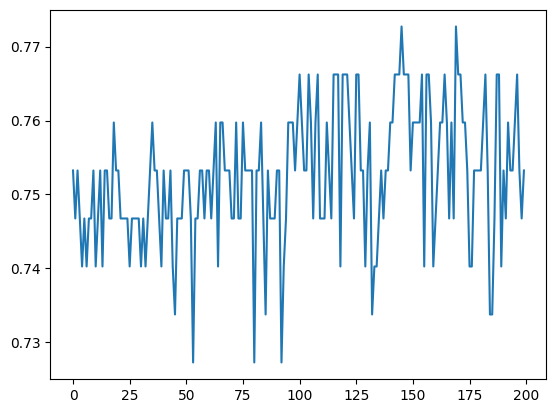

In [93]:
import matplotlib.pyplot as plt
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.plot(history,history['accuracy'],label='acc')
plt.legend()
plt.plot()

In [ ]:
history